##  Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import pmdarima
import matplotlib.pyplot as plt

## Importar dataframe

In [ ]:
# 1) Ler base mensal pronta para modelagem
df = pd.read_parquet(
    "/home/usuario/Documentos/Escorpiao_series/Dados_processados/3_df_agregado_muni.parquet"
)

# 2) Checagens rápidas
print(df.shape)
print(df.dtypes)
df.head()

## Rodar piloto somente em um municipio

In [9]:
# Escolha um município para o piloto
municipio = 'SAO PAULO'   # pode trocar depois

# Filtrar dados do município
df_mun = df[df['NOME_MUNI'] == municipio].copy()

# Ordenar por data
df_mun = df_mun.sort_values('DATA')

# Criar a série temporal (index datetime, valores = TAXA_MENSAL)
y = df_mun.set_index('DATA')['TAXA_MENSAL']

# Conferências
print(y.shape)
y.head(12), y.tail(12)


(120,)


(DATA
 2014-01-01    0.2
 2014-02-01    0.1
 2014-03-01    0.1
 2014-04-01    0.0
 2014-05-01    0.0
 2014-06-01    0.1
 2014-07-01    0.1
 2014-08-01    0.1
 2014-09-01    0.1
 2014-10-01    0.1
 2014-11-01    0.2
 2014-12-01    0.2
 Name: TAXA_MENSAL, dtype: float64,
 DATA
 2023-01-01    0.1
 2023-02-01    0.1
 2023-03-01    0.2
 2023-04-01    0.2
 2023-05-01    0.1
 2023-06-01    0.2
 2023-07-01    0.2
 2023-08-01    0.2
 2023-09-01    0.2
 2023-10-01    0.2
 2023-11-01    0.1
 2023-12-01    0.2
 Name: TAXA_MENSAL, dtype: float64)

In [ ]:
from pmdarima import auto_arima

# Ajuste do modelo SARIMA automático
modelo = auto_arima(
    y,                  # série temporal
    seasonal=True,      # há sazonalidade
    m=12,               # período sazonal = 12 meses
    stepwise=True,      # busca mais rápida
    suppress_warnings=True,
    error_action='ignore',
    trace=True          # MOSTRA os modelos testados (didático)
)

# Resumo do modelo escolhido
modelo.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-266.083, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-189.606, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-273.195, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-258.677, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-43.720, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-256.792, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=-271.198, Time=0.60 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=-271.202, Time=0.30 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=-272.178, Time=0.11 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=-269.915, Time=0.92 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=-233.346, Time=0.14 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=-272.301, Time=0.37 sec
 ARIMA(1,0,1)(1,0,0)[12] intercept   : AIC=-272.255, Time=0.25 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-260.236, Time=0.16 sec
 ARIMA(2,0,1)(1,0,0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  120
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                 140.598
Date:                            dom, 25 jan 2026   AIC                           -273.195
Time:                                    01:36:18   BIC                           -262.045
Sample:                                01-01-2014   HQIC                          -268.667
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0436      0.013      3.381      0.001       0.018       0.069
ar.L1          0.5657      0.057      9.925      0.000       0.454       0.677
ar.S.L12       0.3934      0.074      5.302      0.000       0.248       0.539
sigma2         0.0055      0.001     10.351      0.000       0.004       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                14.42
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             0.22
Prob(H) (two-sided):                  0.71   Kurtosis:                         4.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

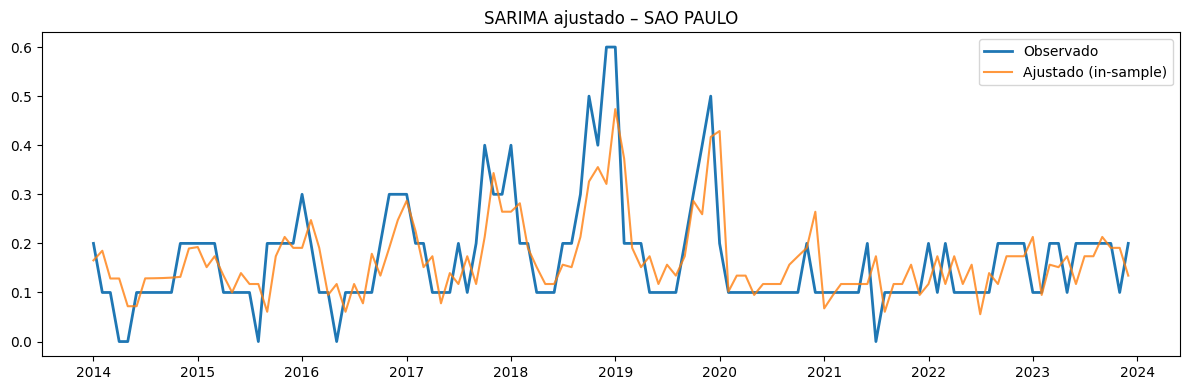

In [11]:
# Valores ajustados (in-sample)
y_fitted = pd.Series(modelo.predict_in_sample(), index=y.index)

# Gráfico: observado vs ajustado
plt.figure(figsize=(12, 4))
plt.plot(y, label='Observado', linewidth=2)
plt.plot(y_fitted, label='Ajustado (in-sample)', alpha=0.8)
plt.title(f'SARIMA ajustado – {municipio}')
plt.legend()
plt.tight_layout()
plt.show()


## Previsão no modelo

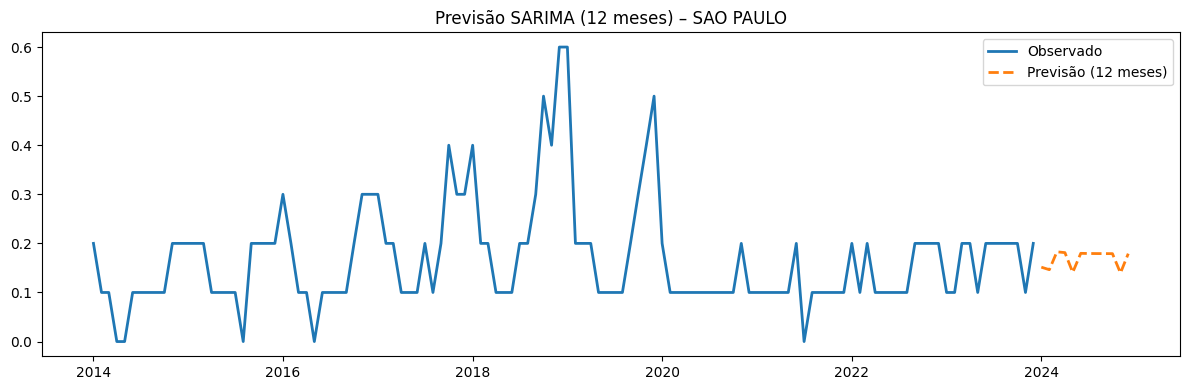

,PREV_TAXA_MENSAL
2024-01-01,0.151552
2024-02-01,0.146402
2024-03-01,0.182830
2024-04-01,0.181182
2024-05-01,0.140907
2024-06-01,0.179722
2024-07-01,0.179424
2024-08-01,0.179255
2024-09-01,0.179160
2024-10-01,0.179106


In [14]:
# Prever 12 meses à frente
n_periods = 12
prev_12 = modelo.predict(n_periods=n_periods)

# Criar índice de datas futuras
datas_futuras = pd.date_range(
    start=y.index[-1] + pd.offsets.MonthBegin(),
    periods=n_periods,
    freq='MS'
)

# DataFrame da previsão
df_prev = pd.DataFrame(
    {'PREV_TAXA_MENSAL': prev_12},
    index=datas_futuras
)

# Plot: histórico + previsão
plt.figure(figsize=(12, 4))
plt.plot(y, label='Observado', linewidth=2)
plt.plot(df_prev['PREV_TAXA_MENSAL'], label='Previsão (12 meses)', linestyle='--', linewidth=2)
plt.title(f'Previsão SARIMA (12 meses) – {municipio}')
plt.legend()
plt.tight_layout()
plt.show()

df_prev


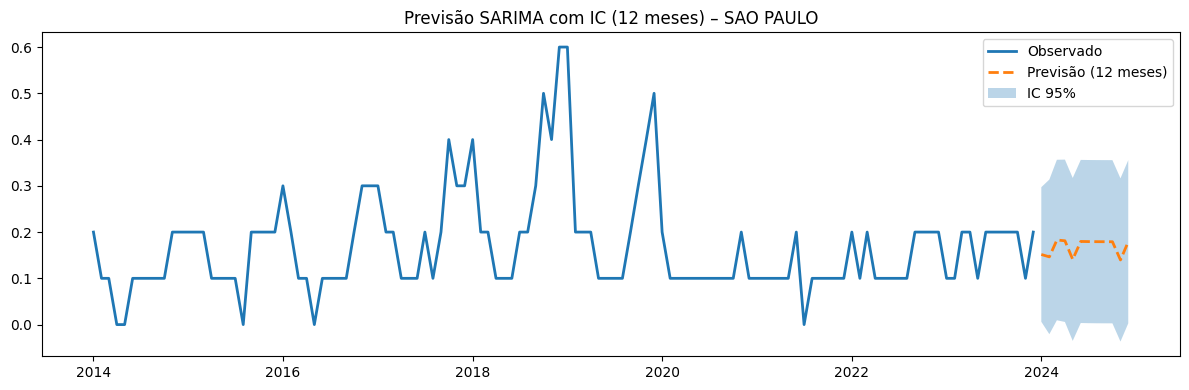

,PREV_TAXA_MENSAL,IC_INF,IC_SUP
2024-01-01,0.151552,0.006076,0.297028
2024-02-01,0.146402,-0.020737,0.313540
2024-03-01,0.182830,0.009330,0.356331
2024-04-01,0.181182,0.005694,0.356670
2024-05-01,0.140907,-0.035211,0.317026
2024-06-01,0.179722,0.003402,0.356043
2024-07-01,0.179424,0.003039,0.355809
2024-08-01,0.179255,0.002850,0.355660
2024-09-01,0.179160,0.002748,0.355572
2024-10-01,0.179106,0.002692,0.355520


In [15]:
# Previsão com intervalos de confiança (95%)
prev_12, ic_12 = modelo.predict(
    n_periods=12,
    return_conf_int=True,
    alpha=0.05
)

# DataFrame com previsão e IC
df_prev_ic = pd.DataFrame({
    'PREV_TAXA_MENSAL': prev_12,
    'IC_INF': ic_12[:, 0],
    'IC_SUP': ic_12[:, 1]
}, index=datas_futuras)

# Plot: histórico + previsão + IC
plt.figure(figsize=(12, 4))
plt.plot(y, label='Observado', linewidth=2)
plt.plot(df_prev_ic['PREV_TAXA_MENSAL'], label='Previsão (12 meses)', linestyle='--', linewidth=2)
plt.fill_between(
    df_prev_ic.index,
    df_prev_ic['IC_INF'],
    df_prev_ic['IC_SUP'],
    alpha=0.3,
    label='IC 95%'
)
plt.title(f'Previsão SARIMA com IC (12 meses) – {municipio}')
plt.legend()
plt.tight_layout()
plt.show()

df_prev_ic
